# `Project`

The `Project` class lets us handle groups of wells. It is really just a list of `Well` objects.

In [1]:
from welly import Project

In [2]:
!ls *.LAS

P-129_out.LAS  P-130_out.LAS


In [3]:
p = Project.from_las("P-*.LAS")

2it [00:15,  8.02s/it]


In [4]:
len(p)

2

In [5]:
p

Index,UWI,Data,Curves
0,100/N14A/11E05,18 curves,"CALI, DT, NPHI_SAN, NPHI_LIM, NPHI_DOL, DPHI_LIM, DPHI_SAN, DPHI_DOL, M2R9, M2R6, M2R3, M2R2, M2R1, GR, SP, PEF, DRHO, RHOB"
1,Long = 63* 45'24.460 W,24 curves,"CALI, HCAL, PEF, DT, DTS, DPHI_SAN, DPHI_LIM, DPHI_DOL, NPHI_SAN, NPHI_LIM, NPHI_DOL, RLA5, RLA3, RLA4, RLA1, RLA2, RXOZ, RXO_HRLT, RT_HRLT, RM_HRLT, DRHO, RHOB, GR, SP"


Typical, the UWIs are a disaster. Let's ignore this for now.

The `Project` is really just a list-like thing:

In [9]:
for w in p:
    print(w.uwi)

100/N14A/11E05
Long = 63* 45'24.460  W


## Plot curves from several wells

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
alias = {'GR': ['GR', 'GRC', 'NGT']}

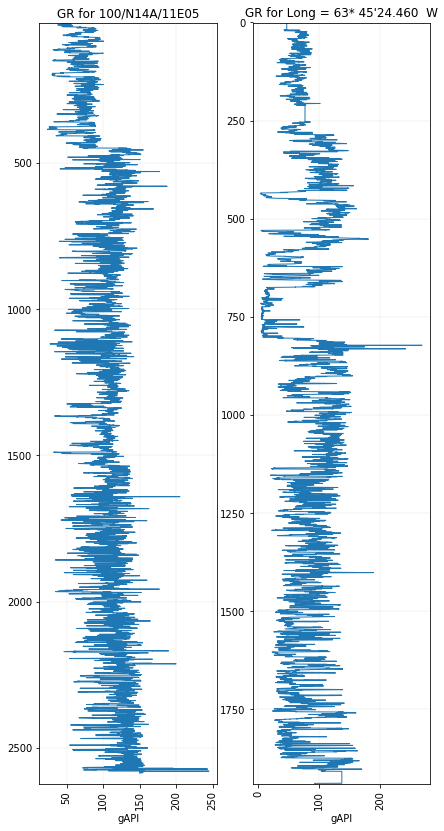

In [8]:
fig, axs = plt.subplots(figsize=(7, 14), ncols=2)

for i, w in enumerate(p):
    ax = axs[i]
    gr = w.get_curve('GR', alias=alias)
    ax = gr.plot(ax=ax)
    ax.set_title("GR for {}".format(w.uwi))
    
plt.show()

## Export data to pandas DataFrame

This makes a DataFrame using a dual index of UWI and Depth.

In [9]:
df = p.df()

In [10]:
df.head()

CALI  DT  NPHI_SAN  NPHI_LIM  NPHI_DOL  DPHI_LIM  \
UWI            Depth                                                     
100/N14A/11E05 20.1    NaN NaN       NaN       NaN       NaN       NaN   
               20.2    NaN NaN       NaN       NaN       NaN       NaN   
               20.3    NaN NaN       NaN       NaN       NaN       NaN   
               20.4    NaN NaN       NaN       NaN       NaN       NaN   
               20.5    NaN NaN       NaN       NaN       NaN       NaN   

                      DPHI_SAN  DPHI_DOL  M2R9  M2R6 ...  RLA1  RLA2  RXOZ  \
UWI            Depth                                 ...                     
100/N14A/11E05 20.1        NaN       NaN   NaN   NaN ...   NaN   NaN   NaN   
               20.2        NaN       NaN   NaN   NaN ...   NaN   NaN   NaN   
               20.3        NaN       NaN   NaN   NaN ...   NaN   NaN   NaN   
               20.4        NaN       NaN   NaN   NaN ...   NaN   NaN   NaN   
               20.5        NaN       NaN   NaN   NaN ...   NaN   NaN   NaN   

                      RXO_HRLT  RT_HRLT  RM_HRLT  DRHO  RHOB  GR  SP  
UWI            Depth                                                  
100/N14A/11E05 20.1        NaN      NaN      NaN   NaN   NaN NaN NaN  
               20.2        NaN      NaN      NaN   NaN   NaN NaN NaN  
               20.3        NaN      NaN      NaN   NaN   NaN NaN NaN  
               20.4        NaN      NaN      NaN   NaN   NaN NaN NaN  
               20.5        NaN      NaN      NaN   NaN   NaN NaN NaN  

[5 rows x 42 columns]

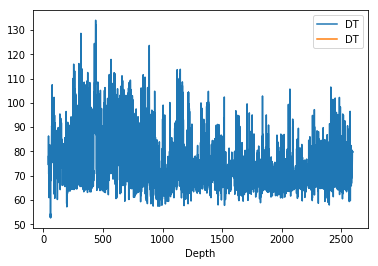

In [13]:
df.loc['100/N14A/11E05'].DT.plot()